TAREA SEMANA 4 FINAL
--

INTEGRANTES:
- Sandy Alcivar
- Hugo Guzman

**1. Importe la base de datos a una base en Jupyter Notebook con pandas.**
--

In [38]:
import pandas as pd
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención?**
--

In [39]:
# Descriptivos resumen de la base de datos
descriptivos_resumen = df.describe(include='all')

# Identificar variables numéricas
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Identificar variables categóricas
variables_categoricas = df.select_dtypes(include=['object']).columns

# Mostrar los descriptivos resumen
print("Descriptivos Resumen:\n", descriptivos_resumen)

# Mostrar las variables numéricas
print("\nVariables Numéricas:\n", variables_numericas)

# Mostrar las variables categóricas
print("\nVariables Categóricas:\n", variables_categoricas)


Descriptivos Resumen:
               Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782   
std       12.988182         NaN  5.643666e+05      0.255049    18.444933   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000         NaN  5.533501e+05      0.000000    47.460000   
50%       23.000000         NaN  9.607460e+05      0.000000    62.670000   
75%       34.000000         NaN  1.420159e+06      0.000000    74.940000   
max       45.000000         NaN  3.818686e+06      1.000000   100.140000   

         Fuel_Price          CPI  Unemployment  
count   6435.00

1.Variables Numéricas: 

Las variables numéricas son 'Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI' y 'Unemployment'. Aunque 'Holiday_Flag' se describe como una variable numérica debido a que está codificada con 0 y 1, en realidad representa una variable categórica (binaria) que indica la presencia de un feriado.


2.Variable Categórica: 'Date' es la única variable categórica identificada, que corresponde a la fecha de las ventas semanales.


3.Resumen:

- Store: Hay 45 tiendas únicas, representadas equitativamente (cada una aparece 143 veces en el dataset).
- Weekly_Sales: Las ventas semanales tienen una media de aproximadamente $ 1,046,965  con una desviacion estandar significativa de $ 564,366, lo que sugiere una variabilidad considerable en las ventas semanales entre las tiendas.
- Holiday_Flag: Aproximadamente el 7% de los registros corresponden a semanas con un feriado.
- Temperature: La temperatura varía considerablemente, con un mínimo de -2.06 (posiblemente grados Fahrenheit) y un máximo de 100.14.
- Fuel_Price: El precio del combustible varía entre $2.472 y $4.468, con una media de $3.358.
- CPI: El Índice de Precios al Consumidor (CPI) también varía, lo cual es de esperar dado que es una medida que tiende a cambiar con el tiempo.
- Unemployment: La tasa de desempleo tiene una media de aproximadamente 8%, con una desviación estándar de 1.88, indicando variabilidad en el mercado laboral entre las diferentes localidades de las tiendas.


4. Observaciones:
- La variable 'Date' podría necesitar ser convertida a un formato de fecha para permitir un análisis de series de tiempo más efectivo.
- 'Holiday_Flag' debería ser tratada como categórica en el análisis, a pesar de que está codificada como numérica.
- La alta desviación estándar en 'Weekly_Sales' indica que puede haber una gran diferencia en las ventas entre las tiendas y con el tiempo, lo que podría justificar una investigación más profunda sobre los factores que influyen en las ventas.
- No hay valores únicos, principales o frecuencia reportados para las variables numéricas, lo cual es adecuado ya que esos descriptivos están generalmente reservados para variables categóricas.


**3. Evalúe si la base contiene datos perdidos.**
--

In [40]:
# Evaluar si la base contiene datos perdidos
datos_perdidos = df.isnull().sum()

# Mostrar la cantidad de datos perdidos por columna
print(datos_perdidos)


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


El resultado indica que no hay datos perdidos en ninguna de las columnas de la base de datos de Walmart. 

**4. Evalúe si alguna de las variables contiene datos atípicos (outliers).De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir.**
--

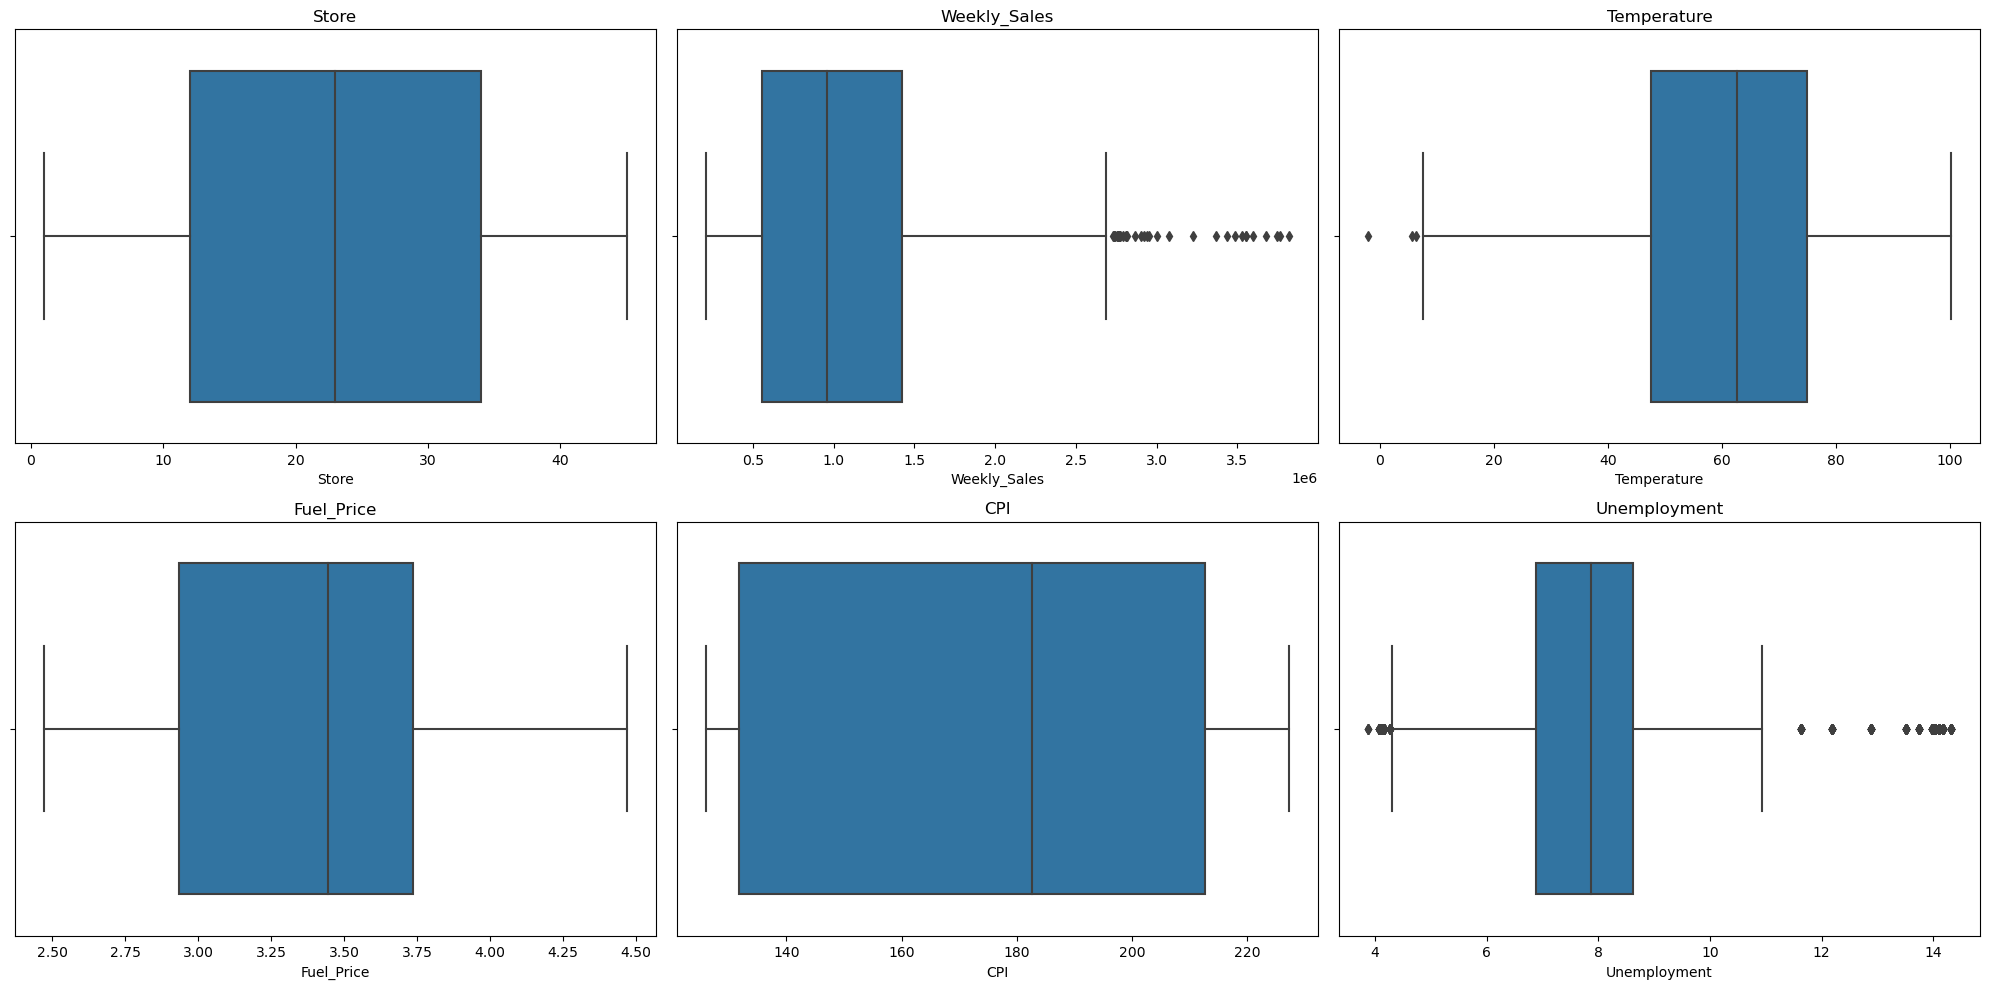

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo las variables numéricas que no son binarias.
# Excluimos 'Holiday_Flag' porque, aunque es numérica, se comporta como categórica.
variables_numericas_no_binarias = [column for column in variables_numericas if column != 'Holiday_Flag']


plt.figure(figsize=(20, 10))

# Generamos un boxplot para cada variable numérica no binaria
for index, column in enumerate(variables_numericas_no_binarias, start=1):
    plt.subplot(2, 3, index) # Subplot para cada gráfico
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout() 
plt.show()



Los boxplots generados para cada variable numérica no binaria de la base de datos de Walmart muestran la presencia de outliers en varias de las variables:

- Weekly_Sales: Hay numerosos puntos por encima del bigote superior, lo que sugiere que hay semanas con ventas significativamente más altas que el promedio. Estos podrían corresponder a períodos de alta demanda, como festividades.

- Temperature: Hay algunos puntos por debajo del bigote inferior, indicando días con temperaturas excepcionalmente bajas.

- Fuel_Price: Aunque los outliers no son tan prominentes, hay un par de puntos por encima del bigote superior.

- CPI: Esta variable también tiene unos pocos puntos por encima del bigote superior.

Unemployment: Hay outliers tanto por encima como por debajo de los bigotes, indicando variabilidad en las tasas de desempleo que pueden ser inusualmente altas o bajas.

In [42]:
# Identificar outliers utilizando el método IQR y eliminarlos
outliers = pd.DataFrame()
 
for col in variables_numericas_no_binarias:
    # Calcular Q1 (el primer cuartil) y Q3 (el tercer cuartil)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
 
    # Los límites para los outliers son aquellos que están fuera del rango de (Q1 - 1.5 * IQR) y (Q3 + 1.5 * IQR)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtrar los outliers
    filter_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # Agregar los outliers al DataFrame de outliers
    outliers = pd.concat([outliers, filter_outliers], axis=0)
    # Eliminar los outliers del DataFrame original
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
 
print(f'Se han detectado {outliers.shape[0]} outliers en total.')

Se han detectado 518 outliers en total.


**5. Grafique las distribuciones de las variables y a priori comente sobre ellas.**
--

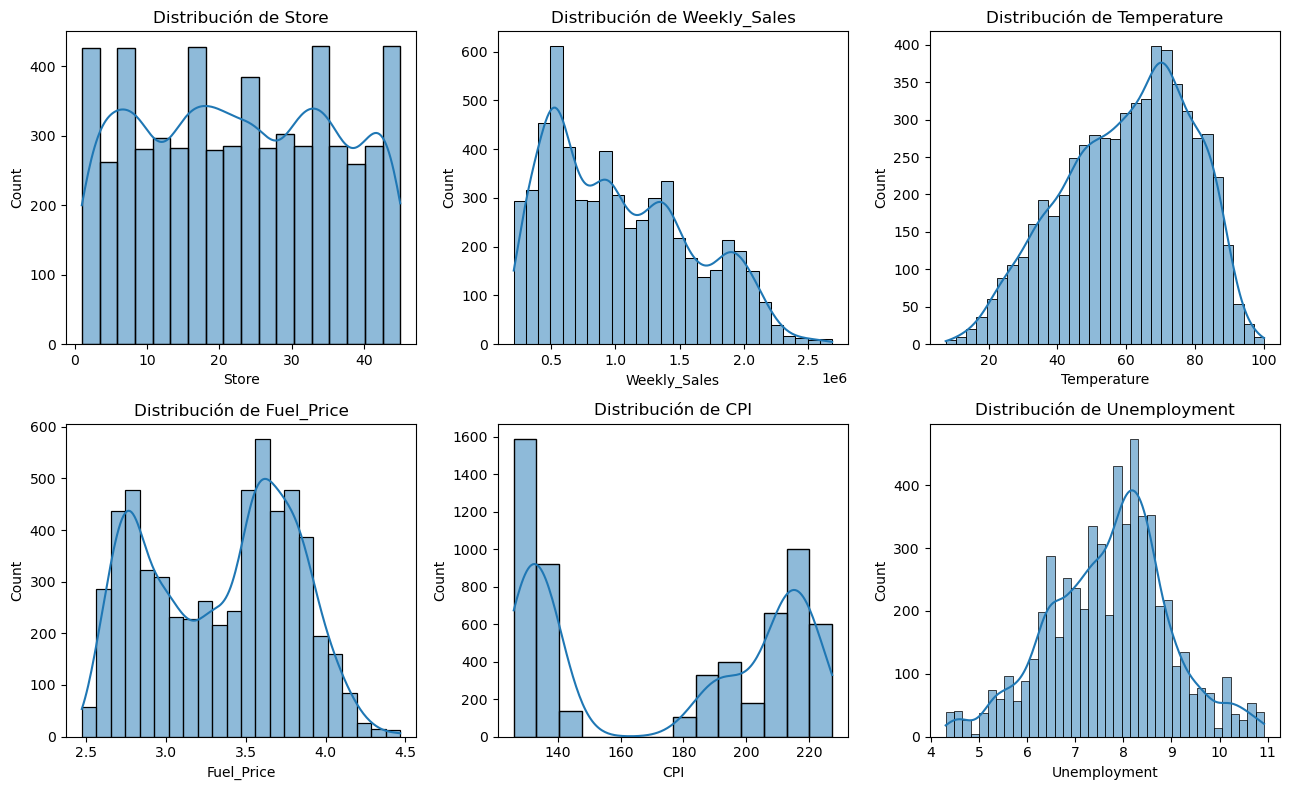

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Configura el tamaño de la figura para tener una mejor visualización
plt.figure(figsize=(13, 8))
 
# Grafica un histograma y una estimación de la densidad de kernel para cada variable numérica no binaria
for i, col in enumerate(variables_numericas_no_binarias, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
 
plt.tight_layout()
plt.show()

Las distribuciones de las variables numéricas de la base de datos de Walmart muestran varias características distintas:
 
- Store: La distribución de 'Store' muestra picos uniformes a lo largo de todo el rango, lo cual es de esperar ya que cada tienda debería tener un número similar de registros de ventas semanales.
 
- Weekly_Sales: La distribución de las ventas semanales es asimétrica hacia la derecha, indicando la presencia de semanas con ventas mucho más altas que el promedio. Esto sugiere que hay periodos de tiempo donde las ventas aumentan significativamente, posiblemente debido a temporadas festivas o promociones.
 
- Temperature: La temperatura tiene una distribución que parece aproximarse a una distribución normal, indicando que hay una variedad de temperaturas registradas, desde bajas hasta altas, con la mayoría de los datos centrados alrededor de una temperatura media.
 
- Fuel_Price: El precio del combustible muestra picos específicos, lo que puede sugerir que hay ciertos valores de precio del combustible que ocurren con mayor frecuencia. Esto podría estar relacionado con estabilizaciones de precios o periodos donde los precios han permanecido constantes.
 
- CPI: El índice de precios al consumidor (CPI) muestra una distribución multimodal, lo que indica que hay varios períodos de tiempo con distintos niveles de CPI.
 
- Unemployment: La tasa de desempleo muestra una distribución que también parece aproximarse a una normal pero con un ligero sesgo hacia la derecha, indicando la presencia de tasas de desempleo más altas de lo normal en algunos casos.


**6. Obtenga las correlaciones entre los datos de corte numérico.**
--

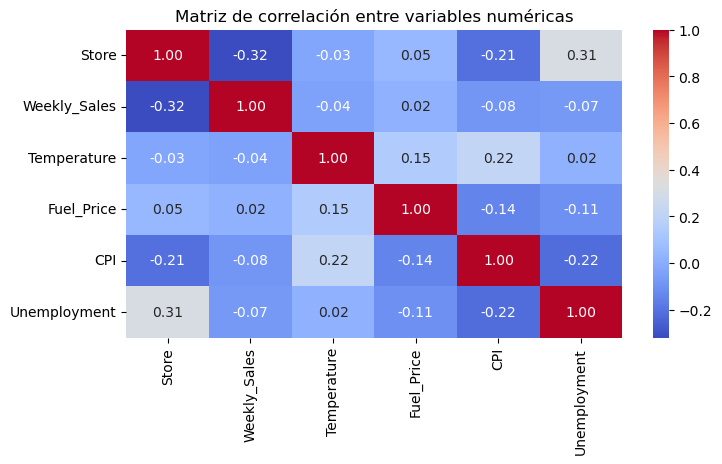

In [44]:

# Lista de variables numéricas, excluyendo 'Holiday_Flag'
variables_numericas_para_correlacion = [column for column in df.columns if df[column].dtype != 'object' and column != 'Holiday_Flag']

correlaciones = df[variables_numericas_para_correlacion].corr()
 
plt.figure(figsize=(8, 4))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

**7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.**
--

Dentro del contexto de los datos de Walmart, l objetivo entender las ventas semanales de las tiendas, entonces la elección natural para la variable dependiente sería `Weekly_Sales`.
 
Varibales independientes:
 
- Temperature: Puede afectar los hábitos de compra de los consumidores.
- Fuel_Price: Un aumento en el precio del combustible podría afectar los costos de logística o el poder adquisitivo de los consumidores.
- CPI: El índice de precios al consumidor es un indicador de la economía y el poder adquisitivo, lo que puede influir en las ventas.
- Unemployment: Una mayor tasa de desempleo podría indicar una economía más débil y, posiblemente, menos gastos de los consumidores.
 
- La variable `Store`
- La variable `Holiday_Flag` se ha considerado categórica.
 

**8. Indique que tipo de modelación realizarán y porqué.**
--

In [45]:
df=df.set_index(['Date', 'Store'])

In [83]:
Date = df.index.get_level_values('Date').to_list()
df['Date'] = pd.Categorical(Date)

In [84]:
df['Holiday_Flag'] = df['Holiday_Flag'].astype('category')

In [85]:
!pip install linearmodels

In [86]:
from linearmodels import PooledOLS
import statsmodels.api as sm

In [113]:
import numpy as np

X = df[['Fuel_Price', 'Temperature', 'Unemployment']]
X = sm.add_constant(X)  

# Aplicar el logaritmo natural a la variable Weekly_days
df['Weekly_Sales_log'] = df['Weekly_Sales'].apply(lambda x: np.log(x))

y = df['Weekly_Sales_log']

In [114]:
#MODELO DE POOLED OLS
modelo1 = PooledOLS(y, X)
resultados_pooled_OLS = modelo1.fit(cov_type='clustered', cluster_entity=True)

In [115]:
# Store values for checking homoskedasticity graphically
predicciones_pooled_OLS = resultados_pooled_OLS.predict().fitted_values
residuos_pooled_OLS = resultados_pooled_OLS.resids

In [116]:
resultados_pooled_OLS

Dep. Variable:,Weekly_Sales_log,R-squared:,0.0086
Estimator:,PooledOLS,R-squared (Between):,-0.3092
No. Observations:,5917,R-squared (Within):,0.0134
Date:,"Mon, Mar 18 2024",R-squared (Overall):,0.0086
Time:,21:50:05,Log-likelihood,-5208.6
Cov. Estimator:,Clustered,,
,,F-statistic:,17.177
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(3,5913)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,33.451


- Se puede validar que los coeficientes del modelo son significativos.
- El F estadístico de 25.104 yvalor p de 0.00 nos indica que las estimaciones de los coeficientes del modelo son significativas.

-  El valor de R-cuadrado es 0.0087lo que indica que el modelo explica menos del 1% de la variabilidad en las ventas semanales. Esto sugiere que las variables incluidas tienen una capacidad predictiva muy limitada.
 
- El coeficiente para 'Fuel_Price' es positivo, lo que indica que un aumento en el precio del combustible está asociado con un aumento en las ventas semanales, aunque el efecto es pequeño y estadísticamente significativo (p-valor 0.0007
 
- 'Temperature' tiene un coeficiente negativo, sugiriendo que temperaturas más altas están asociadas con una disminución en las ventas semanales, y esta relación es estadísticamente significativa (p-valor 0.0000)
 
- 'Unemployment' tiene un efecto negativo considerable en las ventas semanales con un coeficiente y un t-stat muy negativos, lo que indica una relación fuerte y significativa (p-valor 0.000)


### Verificación de los supuestos de la Regresión Pooled OLS

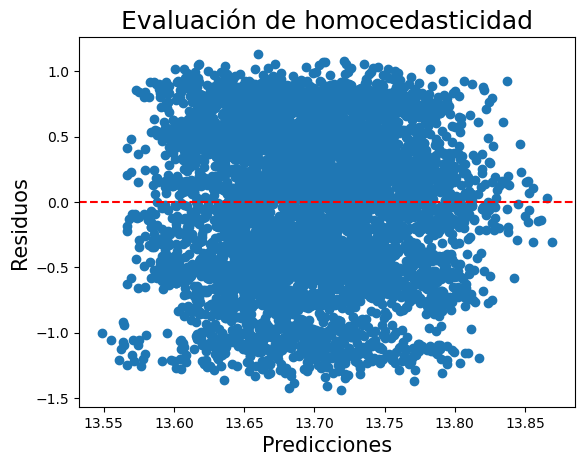

In [117]:
#HOMOCEDASTICIDAD
fig, ax = plt.subplots()
ax.scatter(predicciones_pooled_OLS, residuos_pooled_OLS)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 18)
plt.show()

- La dispersión de los residuos no parece ser constante a lo largo de las predicciones; hay una aparente expansión en la variabilidad de los residuos a medida que aumentan las predicciones. Esto sugiere heterocedasticidad.
- No hay un patrón claro que indique algún tipo de relación no lineal no capturada por el modelo.
- La línea roja punteada ( media de los residuos) parece estar cerca de cero en todo el rango de predicciones, lo cual es bueno; sin embargo, eso no compensa la variabilidad creciente de los residuos.


In [118]:
#Comprobemos esta intuición gráfcia con el test de Breusch-Pagan:
from statsmodels.stats.diagnostic import het_breuschpagan

In [119]:
pooled_OLS_df = pd.concat([df, residuos_pooled_OLS], axis=1)
pooled_OLS_df = pooled_OLS_df.drop(['Date'], axis = 1).fillna(0)
X_ = sm.tools.tools.add_constant(df['Weekly_Sales_log']).fillna(0)

In [120]:
pooled_OLS_df

,,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log,Fuel_Price__log,residual
Date,Store,,,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106,14.312455,0.944684,0.602145
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106,14.311400,0.935309,0.591776
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106,14.292966,0.921875,0.578429
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106,14.158907,0.940398,0.460617
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106,14.256862,0.965081,0.555830
...,...,...,...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684,13.477481,1.385544,-0.216568
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667,13.505522,1.382537,-0.188312
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667,13.506897,1.386294,-0.215497


In [121]:
breusch_pagan = het_breuschpagan(pooled_OLS_df.residual, X_)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan)))

{'LM-Stat': 470.68151481073534, 'LM p-val': 2.277541711554669e-104, 'F-Stat': 511.1858896383931, 'F p-val': 1.2563725192876765e-108}


Como el p-valor del estadístico de Breush-Pagan es < 0.05 (9.051427874328793e-10), entonces se rechaza la hipótesis nula, y por lo tanto estamos en la presencia de heterocedasticidad en el término del error.

- Ho:Las varianzas del error son iguales, hay presencia de homocedasticidad
- Hi:Las varianzas del error no son iguales, hay presencia de heterocedasticidad

In [122]:
#### No- autocorrelación
from statsmodels.stats.stattools import durbin_watson

In [123]:
durbin_watson = durbin_watson(pooled_OLS_df.residual) 
print(durbin_watson)

0.05519391074705386


Durbin-Watson es aproximadamente 0.089. Dado que este valor está muy por debajo de 2, indica una autocorrelación positiva muy fuerte en los residuos del modelo. Esto sugiere que las observaciones adyacentes están altamente correlacionadas positivamente, lo que puede violar la suposición de independencia de los errores en el modelo de regresión.

**9. Verifique los supuestos, de haber escogido el enfoque econométrico.**
--

Los supuestos se los realizó en el punto 8 y en el 9.

**10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.**
--

In [124]:
from linearmodels import RandomEffects

In [125]:
import numpy as np

X2 = df[['Fuel_Price', 'Temperature', 'Unemployment']]
X2 = sm.add_constant(X)  

# Aplicar el logaritmo natural a la variable Weekly_days
df['Weekly_Sales_log'] = df['Weekly_Sales'].apply(lambda x: np.log(x))

y2 = df['Weekly_Sales_log']

In [126]:
## Modelo de Efectos Aleatorios
from linearmodels import RandomEffects

In [127]:
modelo_re = RandomEffects(y2, X2)
resultados_re = modelo_re.fit()

In [128]:
resultados_re

Dep. Variable:,Weekly_Sales_log,R-squared:,0.0086
Estimator:,RandomEffects,R-squared (Between):,-0.3092
No. Observations:,5917,R-squared (Within):,0.0134
Date:,"Mon, Mar 18 2024",R-squared (Overall):,0.0086
Time:,21:50:48,Log-likelihood,-5208.6
Cov. Estimator:,Unadjusted,,
,,F-statistic:,17.177
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(3,5913)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,17.177


In [129]:
## Modelo de Efectos Fijos
from linearmodels import PanelOLS

In [130]:
modelo_fe = PanelOLS(y, X, entity_effects = True)
resultados_fe = modelo_fe.fit()

In [131]:
resultados_fe

Dep. Variable:,Weekly_Sales_log,R-squared:,0.0254
Estimator:,PanelOLS,R-squared (Between):,-5.4411
No. Observations:,5917,R-squared (Within):,0.0254
Date:,"Mon, Mar 18 2024",R-squared (Overall):,-0.0527
Time:,21:53:04,Log-likelihood,-5118.4
Cov. Estimator:,Unadjusted,,
,,F-statistic:,50.136
Entities:,143,P-value,0.0000
Avg Obs:,41.378,Distribution:,"F(3,5771)"
Min Obs:,33.000,,
Max Obs:,42.000,F-statistic (robust):,50.136


In [136]:
#### Test de Haussman
from scipy import stats
import numpy as np
import numpy.linalg as la
from scipy import stats
import numpy as np

In [133]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [134]:
hausman = hausman(resultados_fe, resultados_re) 

In [135]:
print('chi-Squared: ' + str(hausman[0]))
print('degrees of freedom: ' + str(hausman[1]))
print('p-Value:' + str(hausman[2]))

chi-Squared: 100.0073669841714
degrees of freedom: 4
p-Value:9.801165588837388e-21


El valor p es muy pequeño (9.801165588837388e-21), la hipótesis nula puede rechazarse. En consecuencia, el modelo de efectos fijos parece ser el más adecuado, porque claramente tenemos presencia de endogeneidad en nuestro modelo.

- Ho: El modelo preferido es el de efectos aleatorios
- Hi: El modelo preferido es el de efectos fijos

**11. Grafique a los valores predicho de modelo vs los valores reales.¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta.**
--

In [155]:
import matplotlib.pyplot as plt

# Supongamos que 'resultados_fe' contiene los resultados del modelo de efectos fijos
# Supongamos que 'y_real' contiene los valores reales de la variable dependiente
valores_predichos = resultados_fe.fitted_values


# Imprimir los valores predichos
print("Valores predichos:")
print(valores_predichos)


Valores predichos:
                  fitted_values
Date       Store               
05-02-2010 1          13.540180
12-02-2010 1          13.555764
19-02-2010 1          13.535484
26-02-2010 1          13.509583
05-03-2010 1          13.531926
...                         ...
28-09-2012 45         13.863596
05-10-2012 45         13.859953
12-10-2012 45         13.929875
19-10-2012 45         13.906993
26-10-2012 45         13.862903

[5917 rows x 1 columns]


In [151]:
y_real = y

print(y_real)

Date        Store
05-02-2010  1        14.312455
12-02-2010  1        14.311400
19-02-2010  1        14.292966
26-02-2010  1        14.158907
05-03-2010  1        14.256862
                       ...    
28-09-2012  45       13.477481
05-10-2012  45       13.505522
12-10-2012  45       13.506897
19-10-2012  45       13.484400
26-10-2012  45       13.541444
Name: Weekly_Sales_log, Length: 5917, dtype: float64


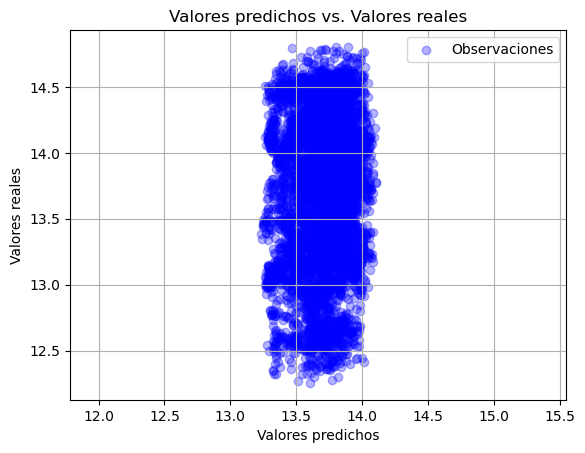

In [157]:
import matplotlib.pyplot as plt
 
# Asumiendo que 'valores_predichos' y 'y_real' son las variables que contienen tus datos.
plt.scatter(valores_predichos, y_real, alpha=0.3, c='blue', label='Observaciones')  # Ajusta el alpha para mejor visualización
 
# Títulos y etiquetas
plt.title('Valores predichos vs. Valores reales')
plt.xlabel('Valores predichos')
plt.ylabel('Valores reales')
 
# Leyenda
plt.legend()
 

plt.axis('equal')  
plt.grid(True) 
 

plt.show()

**12.  Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.**
--



1. El modelo utiliza el logaritmo de las ventas semanales como variable dependiente.
 
2. El número de observaciones es de 5917 con 143 entidades y 45 períodos de tiempo, lo que sugiere un conjunto de datos de panel balanceado, que es ideal para el análisis de PanelOLS.
 
3. A pesar de que el R-cuadrado global es negativo, lo que a primera vista podría parecer inusual, el R-cuadrado dentro de la muestra (within) es positivo (0.0254), lo que indica que el modelo tiene algo de poder explicativo para las variaciones dentro de las entidades a lo largo del tiempo.
 
4. Los coeficientes para las variables independientes (Precio del combustible, Temperatura y Desempleo) son estadísticamente significativos (p-valor de 0.0000), lo que sugiere una fuerte evidencia en contra de la hipótesis nula de que estos coeficientes son cero. Esto indica que los cambios en estas variables están sistemáticamente asociados con cambios en el logaritmo de las ventas semanales.
 
5. La relación con el precio del combustible es positiva, lo que podría interpretarse como que un aumento en el precio del combustible está asociado con un aumento en las ventas semanales, posiblemente debido a una mayor actividad económica o a cambios en los hábitos de consumo.
 
6. La temperatura tiene un pequeño efecto negativo, lo que podría indicar que las temperaturas más altas desalientan las ventas o están relacionadas con temporadas específicas con menores ventas.
 
7. La tasa de desempleo tiene una relación negativa con las ventas semanales, lo que es coherente con la teoría económica, ya que un aumento en el desempleo generalmente reduce el poder adquisitivo y, por lo tanto, puede disminuir las ventas.
 
En general, a pesar del bajo R-cuadrado global, el modelo identifica relaciones estadísticamente significativas entre las variables de interés y las ventas semanales. La significancia de los coeficientes y el razonamiento económico subyacente ofrecen insights valiosos para las decisiones de negocio. Además, la fuerte estadística F (y su correspondiente p-valor de 0.0000) sugiere que el modelo en su conjunto tiene un poder explicativo significativo en relación con la variabilidad de las ventas.